In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import xarray as xr
import seaborn  as sns
import matplotlib.pyplot as plt
import datetime

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


import merge_model

In [5]:
merge_model_pred = xr.open_dataset('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/convlstm_prediction.nc')

In [48]:
merge_model_pred

<xarray.Dataset>
Dimensions:           (lat: 285, lon: 245, time: 363)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-04 2020-01-05 ... 2020-12-31
  * lon               (lon) float32 28.5 28.55 28.6 28.65 ... 40.6 40.65 40.7
  * lat               (lat) float32 -10.7 -10.65 -10.6 -10.55 ... 3.4 3.45 3.5
Data variables:
    predict_precip_1  (time, lat, lon) float32 ...
    predict_precip_2  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history:      Fri May 21 09:18:52 2021: cdo -L -remap,/tmp/nctoolkitlmhrk...
    Conventions:  CF-1.6
    CreatedBy:    EDAL Libraries
    MoreInfo:     https://github.com/Reading-eScience-Centre/edal-java
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

IMERG

In [36]:
imerg = xr.open_dataset('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/predictors/predictors_regridded/IMERG_regridded.nc')

In [49]:
imerg

<xarray.Dataset>
Dimensions:                    (bnds: 2, lat: 285, lon: 245, time: 1827)
Coordinates:
  * time                       (time) datetime64[ns] 2016-01-01 ... 2020-12-31
  * lon                        (lon) float32 28.5 28.55 28.6 ... 40.6 40.65 40.7
  * lat                        (lat) float32 -10.7 -10.65 -10.6 ... 3.4 3.45 3.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds                  (time, bnds) datetime64[ns] 2016-01-01 ... 202...
    precipitationCal           (time, lon, lat) float32 ...
    precipitationCal_cnt       (time, lon, lat) int8 ...
    precipitationCal_cnt_cond  (time, lon, lat) int8 ...
    HQprecipitation            (time, lon, lat) float32 ...
    HQprecipitation_cnt        (time, lon, lat) int8 ...
    HQprecipitation_cnt_cond   (time, lon, lat) int8 ...
    randomError                (time, lon, lat) float32 ...
    randomError_cnt            (time, lon, lat) int8 ...
Attributes: (12/13)
    CDI:             Climate Data Interface version ?? (http://mpimet.mpg.de/...
    history:         Mon May 24 09:11:21 2021: cdo -L -z zip_9 copy /tmp/ncto...
    Conventions:     CF-1.6
    BeginDate:       2016-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2016-01-01
    ...              ...
    FileHeader:      StartGranuleDateTime=2016-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20160101-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-07-28T11:30:40.313Z
    CDO:             Climate Data Operators version 1.9.3 (http://mpimet.mpg....

TAMSAT

In [7]:
tamsat = xr.open_dataset('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/predictors/predictors_regridded/TAMSAT_regridded.nc')

In [50]:
tamsat

<xarray.Dataset>
Dimensions:     (lat: 285, lon: 245, time: 4128)
Coordinates:
  * time        (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2021-04-20
  * lon         (lon) float32 28.5 28.55 28.6 28.65 ... 40.55 40.6 40.65 40.7
  * lat         (lat) float32 -10.7 -10.65 -10.6 -10.55 ... 3.35 3.4 3.45 3.5
Data variables:
    rfe         (time, lat, lon) float32 ...
    rfe_filled  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history:      Fri May 21 09:18:52 2021: cdo -L -remap,/tmp/nctoolkitlmhrk...
    Conventions:  CF-1.6
    CreatedBy:    EDAL Libraries
    MoreInfo:     https://github.com/Reading-eScience-Centre/edal-java
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

CHIRPS

In [8]:
chirps = xr.open_dataset('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/predictors/predictors_regridded/CHIRPS_regridded.nc')

In [76]:
chirps.isel(time = [1574])

<xarray.Dataset>
Dimensions:  (lat: 285, lon: 245, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-04-23
  * lon      (lon) float32 28.5 28.55 28.6 28.65 28.7 ... 40.55 40.6 40.65 40.7
  * lat      (lat) float32 -10.7 -10.65 -10.6 -10.55 -10.5 ... 3.35 3.4 3.45 3.5
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version ?? (http://mpimet.mpg.d...
    history:           Fri May 21 16:47:43 2021: cdo -L -remap,/tmp/nctoolkit...
    institution:       Climate Hazards Group.  University of California at Sa...
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day....
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.3 (http://mpimet.mp...

CMORPH

In [9]:
cmorph = xr.open_dataset('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/predictors/predictors_regridded/CMORPH_regridded.nc')

In [52]:
cmorph

<xarray.Dataset>
Dimensions:        (lat: 285, lon: 245, time: 1827)
Coordinates:
  * time           (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
  * lon            (lon) float32 28.5 28.55 28.6 28.65 ... 40.55 40.6 40.65 40.7
  * lat            (lat) float32 -10.7 -10.65 -10.6 -10.55 ... 3.35 3.4 3.45 3.5
Data variables:
    Precipitation  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history:      Mon May 24 19:35:23 2021: cdo -L -z zip_9 copy /tmp/nctoolk...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [68]:
cmorph.isel(time = [1547])

<xarray.Dataset>
Dimensions:        (lat: 285, lon: 245, time: 1)
Coordinates:
  * time           (time) float64 0.0
  * lon            (lon) float32 28.5 28.55 28.6 28.65 ... 40.55 40.6 40.65 40.7
  * lat            (lat) float32 -10.7 -10.65 -10.6 -10.55 ... 3.35 3.4 3.45 3.5
Data variables:
    Precipitation  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history:      Mon May 24 19:35:23 2021: cdo -L -z zip_9 copy /tmp/nctoolk...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [80]:
list_values = [merge_model_pred.sel(time = '2020-04-23').predict_precip_1.values, merge_model_pred.sel(time = '2020-04-23').predict_precip_2.values,
                 imerg.sel(time = '2020-04-23').precipitationCal.values, tamsat.sel(time = '2020-04-23').rfe_filled.values, chirps.sel(time = '2020-04-23').precip.values,
                 cmorph.isel(time = [1547]).Precipitation.values]

In [152]:
max = 150

In [153]:
cmap = 'viridis'

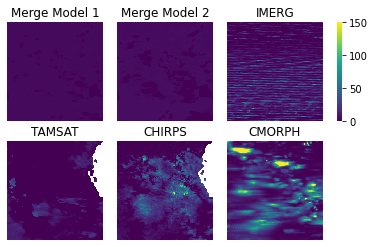

In [154]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharey =False, gridspec_kw={'width_ratios':[1,1,1,0.05]})
#ax1.get_shared_y_axes().join(ax2)
#ax4.get_shared__axes().join(ax8)
g1 = sns.heatmap(list_values[0], vmax = max, cmap = cmap, ax = ax1, cbar_ax=ax4)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Merge Model 1')
g2 = sns.heatmap(list_values[1], cmap = cmap, ax = ax2, vmax = max, cbar_ax = ax4)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Merge Model 2')
g3 = sns.heatmap(list_values[2].reshape(285,245), cmap = cmap, ax = ax3, vmax = max, cbar_ax = ax4)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('IMERG')
g5 = sns.heatmap(list_values[3], cmap = cmap, ax = ax5, vmax = max, cbar_ax = ax4)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_title('TAMSAT')
g6 = sns.heatmap(list_values[4], cmap = cmap, ax = ax6, vmax = max, cbar_ax = ax4)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_title('CHIRPS')
g7 = sns.heatmap(list_values[5][0,:,:], cmap = cmap, ax = ax7, vmax = max, cbar_ax = ax4)
ax7.set_xticks([])
ax7.set_yticks([])
ax7.set_title('CMORPH')
ax8.remove()

In [155]:
fig.savefig('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/figure', dpi = 350)